In [5]:
import numpy as np
from scipy.fft import dst, idst
from scipy.stats import multivariate_normal as gauss2d
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Problem 1

We consider the Poisson Equation given below:

$$ \Delta u(x,y)=f(x,y) $$

We will solve this equation on the square domain $D=\{(x,y):0\leq x,y\leq1\}$, and we denote the boundary of this domain as $\partial D$. With this we consider homogenous Dirichlet boundary conditions, i.e. $u(x,y)=0,\:\forall(x,y)\in\partial D$.

Further, we will assume that the function $f$ is well approximated as follows:

$$ f(x,y)=\sum_{m=1}^N\sum_{n=1}^N\alpha_{mn}\sin(\pi mx)\sin(\pi ny) $$

In the code below we define a solver for the setup given above that uses the discrete sine transform to efficiently compute the solution.

In [3]:
'''
Poisson Equation solver using the Discrete Sine Transform. We assume
that we are operating on the domain [0,1], that we have Dirichlet
boundary conditions, and that f can be well approximated using the mode
specified for the DST.

f -> f(x,y), callable RHS of the equation
N -> Number of samples to take of f
mode -> DST type depending on the form of f

Returns: solution, discretized meshgrid
'''
def poissonEq(f, N, mode=1):
    #First build a grid
    x = np.linspace(0,1,N)
    y = np.linspace(0,1,N)
    
    xx, yy = np.meshgrid(x, y)
    
    #Evaluate f on the grid
    F = f(xx, yy)
    
    #Compute DST coefficients across y
    C = dst(dst(F, type=mode, axis=0), type=mode, axis=1)
    
    #Scale appropriately
    scale = np.array([[(np.pi**2)*(m**2+n**2) for m in range(1,N+1)] for n in range(1,N+1)])
    
    C /= scale
    
    #Compute inverse DST to recover solution
    return idst(idst(C, type=mode, axis=0), type=mode, axis=1), (xx,yy)

Now we will validate our method using a number of right hand sides. We begin by consider the following function, and we will use 100 terms in the transform:

$$ f(x,y)=e^{-(x^2+10y^2)} $$

We note that this doesn't quite explicitly satisfy the boundary conditions, but it is close enough.

In [1]:
def f(x,y):
    return np.exp(-(x**2+10*y**2))

N = 100

In [6]:
u, mesh = poissonEq(f, N)

First, we examine a contour plot.

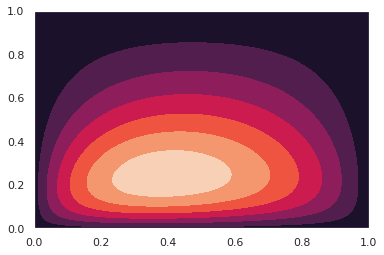

In [8]:
plt.contourf(mesh[0], mesh[1], u);

We can also see the associated 3D plot.

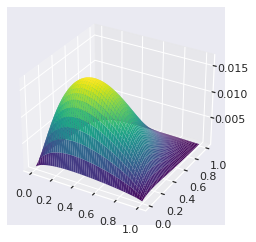

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(mesh[0], mesh[1], u, cmap='viridis', edgecolor='none');

And now we consider a 2D Gaussian with mean 0.5 and covariance 0.01. Again we use 100 terms in the transformation and again we note that this function doesn't quite satisfy the boundary conditions, but is close enough.

In [11]:
def f(x,y):
    g = gauss2d(mean=[0.5,0.5], cov=0.01)
    
    return g.pdf(np.dstack((x,y)))

N = 100

In [12]:
u, mesh = poissonEq(f, N)

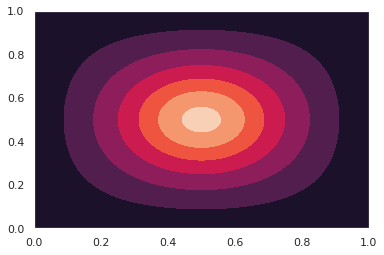

In [14]:
plt.contourf(mesh[0], mesh[1], u);

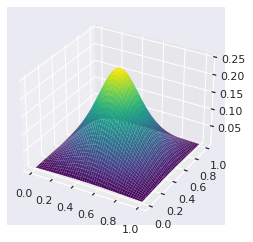

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(mesh[0], mesh[1], u, cmap='viridis', edgecolor='none');

We can see that the solver seems to be working as expected.

# Problem 2

We consider the eliptical domain $D=\{(x,y):\frac{x^2}{a^2}+\frac{y^2}{b^2}\leq 1\}$ whose boundary is given by $\partial D$. With this we take a specific instance of the Poisson equation...

$$ \Delta u(x,y)=1,\quad u(x,y)=x^4+y^4,\quad\forall(x,y)\in\partial D $$


## a).

First, we will reduce the problem above to that with homogenous boundary conditions.

Let $g=-x^4-y^4$ and $v=u+g$ and then we can define the following problem...

$$ \Delta v(x,y)=1+\Delta g,\quad v(x,y)=0,\quad\forall(x,y)\in\partial D$$

It is clear to see that $v(x,y)=0\implies u=x^4+y^4$, and thus our problem is equivalent but with homogenous Dirichlet boundary conditions.

## b).

Next, we will reduce the problem to the Dirichlet problem for the Laplace equation.

In this case let $v=u-\frac{1}{2}x^2$ and then consider the following problem...

$$ \Delta v(x,y)=0,\quad v(x,y)=x^4+y^4-\frac{1}{2}x^2,\quad\forall(x,y)\in\partial D $$

This works because $\Delta\frac{1}{2}x^2=1$, and we note that we could use any function where this is true. We also note that this setup implies $u=x^4+y^4$ on the boundary and is thus equivalent. 